In [1]:
'''
Dataset : Craigslist Used Car Dataset

Team Members :    1] PES2201800116 : Aniketh D Urs 
                  2] PES2201800656 : Manoj Mahesh Patil
                  3] PES2201800480 : Purushotham S
                  4] PES2201800646 : Mahammad Thufail

Problem Statement : To predict the price of the used car using Prediction Models that we create.

Introduction : When we want to sell used cars, one of the biggest problems is deciding reasonable selling prices for the cars. 
An effective way to solve this problem is to use a machine-learning model that can predict car prices.
'''



'\nDataset : Craigslist Used Car Dataset\n\nTeam Members :    1] PES2201800116 : Aniketh D Urs \n                  2] PES2201800656 : Manoj Mahesh Patil\n                  3] PES2201800480 : Purushotham S\n                  4] PES2201800646 : Mahammad Thufail\n\nProblem Statement : To predict the price of the used car using Prediction Models that we create.\n\nIntroduction : When we want to sell used cars, one of the biggest problems is deciding reasonable selling prices for the cars. \nAn effective way to solve this problem is to use a machine-learning model that can predict car prices.\n'

In [2]:
'''Exploratory Data Analysis and Data Cleaning'''

'Exploratory Data Analysis and Data Cleaning'

In [3]:
#First we import Pandas 
import pandas as pd

In [4]:
#Next we import the dataset 
df_original = pd.read_csv('../input/craigslist-carstrucks-data/vehicles.csv')

In [5]:
#Now , let's look at the contents of our dataset 
import numpy as np

df = df_original.copy()

df.iloc[np.r_[0:3, -3:0]]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
423854,7184805809,https://duluth.craigslist.org/cto/d/duluth-94-...,duluth / superior,https://duluth.craigslist.org,700,1994.0,ford,f-150,fair,6 cylinders,...,rwd,NaN,NaN,green,https://images.craigslist.org/00L0L_2MgECwYWhp...,I'm selling this beautiful old pickup that I j...,NaN,mn,46.7715,-92.1279
423855,7184791927,https://duluth.craigslist.org/ctd/d/duluth-199...,duluth / superior,https://duluth.craigslist.org,3800,1999.0,lincoln,town car,excellent,8 cylinders,...,rwd,NaN,sedan,NaN,https://images.craigslist.org/00q0q_6msyGUIqK3...,1999 *** Lincoln Town Car 4dr Sdn Signature Se...,NaN,mn,46.8433,-92.2550
423856,7195109037,https://albuquerque.craigslist.org/ctd/d/albuq...,albuquerque,https://albuquerque.craigslist.org,8650,2015.0,nissan,versa,NaN,NaN,...,fwd,compact,sedan,silver,https://images.craigslist.org/00e0e_aTHizIb1II...,2015 Nissan Versa S Offered by: Southwest ...,NaN,nm,35.1851,-106.5850


In [6]:
'''Cleaning of Dataset'''

'Cleaning of Dataset'

In [7]:
irrelevant_cols = ['id', 'url', 'region_url', 'vin', 'image_url', \
                   'description', 'county']

df = df.drop(columns=irrelevant_cols)

In [8]:
# The "Price" column is our target column , so let's move it to the last of the dataset for convinience.
col_list = ['price']

rearranged_cols = np.hstack((df.columns.difference(col_list, sort=False), col_list))

df = df.reindex(columns=rearranged_cols)

In [9]:
# Now we will make sure that the string values in the dataset are in lower case and there should be no spaces in between
for column in df.columns[1:]:
    if df[column].dtype == 'object':
        df[column] = df[column].str.lower().str.strip()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        423857 non-null  object 
 1   year          328743 non-null  float64
 2   manufacturer  313242 non-null  object 
 3   model         325384 non-null  object 
 4   condition     176719 non-null  object 
 5   cylinders     197679 non-null  object 
 6   fuel          327214 non-null  object 
 7   odometer      270585 non-null  float64
 8   title_status  327759 non-null  object 
 9   transmission  328065 non-null  object 
 10  drive         231119 non-null  object 
 11  size          102627 non-null  object 
 12  type          241157 non-null  object 
 13  paint_color   222203 non-null  object 
 14  state         423857 non-null  object 
 15  lat           324404 non-null  float64
 16  long          324404 non-null  float64
 17  price         423857 non-null  int64  
dtypes: f

In [11]:
# As you can see above that some of the columns have been removed and the price column has been moved to the end of the dataset

In [12]:
# Now let us visualize these NULL values using graphs 

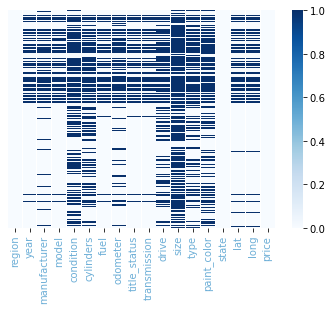

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

heat_map = sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='Blues')
_ = heat_map.set_xticklabels(heat_map.get_xticklabels(), color='#6eafd7')

In [14]:
'''
Missing values can lead to errors in machine-learning models. To avoid these errors, we can use the following workarounds:
         1] Remove selected rows that contain missing values.
         2] Replace missing values with estimates by using scikit-learn imputers.

As we want our algorithms to be accurate, we must retain as much of the car data as possible.
This means that we will have to impute many of the missing values.
At the same time, we want to minimize instances of incorrect data.
So, we will delete selected rows as well.
'''

'\nMissing values can lead to errors in machine-learning models. To avoid these errors, we can use the following workarounds:\n         1] Remove selected rows that contain missing values.\n         2] Replace missing values with estimates by using scikit-learn imputers.\n\nAs we want our algorithms to be accurate, we must retain as much of the car data as possible.\nThis means that we will have to impute many of the missing values.\nAt the same time, we want to minimize instances of incorrect data.\nSo, we will delete selected rows as well.\n'

In [15]:
'''What are Extra Tree Regressor and Bayesian Ridge ?

Extratreesregressor divides a target dataset into smaller subsets. 
Then, it uses multiple decision trees, or extra trees, on the subsets to determine how various attributes of the dataset interrelate.
It combines the findings of the trees to generate an average value for each null field.

Unlike Extratreesregressor, BayesianRidge uses linear regression to determine relationships between variables. 
Based on these relationships, it generates regularized values for non-null fields.'''

'What are Extra Tree Regressor and Bayesian Ridge ?\n\nExtratreesregressor divides a target dataset into smaller subsets. \nThen, it uses multiple decision trees, or extra trees, on the subsets to determine how various attributes of the dataset interrelate.\nIt combines the findings of the trees to generate an average value for each null field.\n\nUnlike Extratreesregressor, BayesianRidge uses linear regression to determine relationships between variables. \nBased on these relationships, it generates regularized values for non-null fields.'

In [16]:
# Now we import necessary modules for ExtraTreeRegressor and Bayesian Ridge
import warnings
warnings.filterwarnings('ignore')

from sklearn.experimental import enable_iterative_imputer

from sklearn import preprocessing
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import ExtraTreesRegressor

imputers = [
    BayesianRidge(),
    ExtraTreesRegressor(n_estimators=10, random_state=0),
]

In [17]:
# Now we divide the columns into 2 groups , i.e categorical and numerical 
from collections import Counter

numerical = ['year', 'odometer', 'lat', 'long']

categorical = list((Counter(df.columns) -\
                    Counter(numerical + ['manufacturer', 'model', 'price'])).elements())

In [18]:
# First, we will use Extratreesregressor to fill out the null fields of the numerical columns.
sr_numerical = df[numerical]
imp_numerical = IterativeImputer(imputers[1])
imputed_vals = imp_numerical.fit_transform(sr_numerical)
df[numerical] = imputed_vals

In [19]:
# The numerical columns have no NULL vaues in them now 
df.isnull().sum()[numerical]

year        0
odometer    0
lat         0
long        0
dtype: int64

In [20]:
''' Now we will use Bayesian Ridge to remove NULL values in categorical column .
But the algorithm cannot understand the data as it is in string format . 
So we have to encode it .
'''

' Now we will use Bayesian Ridge to remove NULL values in categorical column .\nBut the algorithm cannot understand the data as it is in string format . \nSo we have to encode it .\n'

In [21]:
def encode(data_col):
    #A function that transforms non-null values
    vals = np.array(data_col.dropna())
    # Reshaping the non-null data of a column
    reshaped_data = vals.reshape(-1,1)
    # Encoding the reshaped data
    encoded_data = encoder.fit_transform(reshaped_data)
    # Assigning the encoded values to the corresponding column values
    data_col.loc[data_col.notnull()] = np.squeeze(encoded_data)
    return data_col

In [22]:
# Now let us use the encode function
sr_categorical = df[categorical]
encoder = preprocessing.LabelEncoder()

# Using a for loop to iterate through each categorical column and
# filling out its null fields
for column in categorical:
    encode(sr_categorical[column])
    imp_categorical = IterativeImputer(BayesianRidge())
    imputed_vals_cat = imp_categorical.fit_transform(sr_categorical[column].values.reshape(-1, 1))
    imputed_vals_cat = imputed_vals_cat.astype('int64')
    imputed_vals_cat = pd.DataFrame(imputed_vals_cat)
    imputed_vals_cat = encoder.inverse_transform(imputed_vals_cat.values.reshape(-1, 1))
    sr_categorical[column] = imputed_vals_cat

df[categorical]= sr_categorical

In [23]:
# We have successfully removed the null values in the categorical group also.
df.isnull().sum()[categorical]

region          0
condition       0
cylinders       0
fuel            0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [24]:
# Now let us take a peek at our dataset 
df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,price
0,duluth / superior,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,full-size,pickup,red,mn,46.8433,-92.2550,6995
1,duluth / superior,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,full-size,pickup,grey,mn,46.9074,-92.4638,8750
2,new haven,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,full-size,pickup,blue,ct,41.1770,-73.1336,10900
3,albuquerque,2003.0,mitsubishi,lancer,good,4 cylinders,gas,218500.0,clean,manual,4wd,mid-size,sedan,grey,nm,35.1868,-106.6650,12500
4,duluth / superior,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white,mn,45.6836,-92.9648,16995


In [25]:
df.loc[:, ['region', 'manufacturer', 'model']]\
[df.model.str.startswith(r'$500', na=False)]

,region,manufacturer,model


In [26]:
# Let us see how many unique values our dataset contains 
df.apply(pd.Series.nunique)

region             404
year               288
manufacturer        43
model            25919
condition            6
cylinders            8
fuel                 5
odometer        115439
title_status         6
transmission         3
drive                3
size                 4
type                13
paint_color         12
state               51
lat              42366
long             42689
price            16305
dtype: int64

In [27]:
# The dataset is fairly clean now. Let us save it as a CSV file.
df.to_csv('vehicles_eda.csv', index=False)

In [28]:
'''Visualization'''

'Visualization'

In [29]:
# We will be using  Seaborn Displot for plotting graphs .
# Remember our Target Variable is : "Price"
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(6,3)})

def plot_histogram(col, color_val='#005c9d',\
                   x_label='Price [x10\u2076 USD]', y_label='Frequency',\
                   title_text='Distribution of car prices'):
    sns.distplot(col, kde=False, color=color_val)
    
    ax = plt.gca()
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title_text)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)

    plt.show()

In [30]:
# We will also import the CSV file that we had saved in the previous step.
df = pd.read_csv('vehicles_eda.csv')

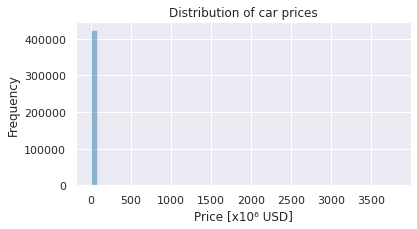

In [31]:
# Now we plot histogram 
price_mill = df.price/10**6
plot_histogram(price_mill)

In [32]:
# The above graph shows that the maximum number of Price values are around zero.
# This is because we have taken the range wrong .
# So we scale the Price range between USD 0 - 60,000 range 

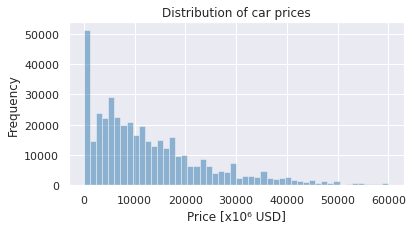

In [33]:
plot_histogram(df.price[df.price<60000])

In [34]:
# Apparently a large number of Prices are around 0 . 
# We calculate the mean , median 
print('Mean:', df.price.mean())
print()
print('Median: ', df.price.median())

Mean: 57794.37477734236

Median:  9995.0


In [35]:
print('Max. price: ', df.price.max())

Max. price:  3808256046


In [36]:
# The min value is 0 , whereas the max value , as you can see above is huge !
# Why is this ?
# This is because of the presence of outliers.

In [37]:
# Let's look at some attributes that are of higher values 
cols = ['region', 'year', 'manufacturer', 'model', 'price']

df.loc[:, cols][df.price>100000].sort_values(by='price', ascending=False).head(10)

,region,year,manufacturer,model,price
300026,flint,2007.00,saturn,aura,3808256046
207260,modesto,2020.00,gmc,NaN,2808348671
74638,south florida,2008.62,NaN,NaN,2632269824
67033,atlanta,2014.00,dodge,dart,2490531375
83332,new york city,2008.62,NaN,NaN,2039470154
263247,northwest CT,1948.00,NaN,willys jeepster,1215752191
349616,greenville / upstate,1951.00,NaN,hudson commodore,999999999
244265,"kansas city, MO",1932.00,ford,roadster,410065408
360902,tulsa,2021.00,NaN,any and all,200400600
141162,southwest MN,1985.00,NaN,gmc/chev,200014000


In [38]:
# As you can see above , the prices of the cars is in Billions , which is impossible.
# To remove these outliers we use Inter Quartile Range (IQR)
# But to apply IQR , the data should be uniform
# But our target columne i.e Price columns is not uniform 
# So we use Logarithmic Function to bring uniformity and add a modified version of the Price column.

In [39]:
df.insert(17, 'logprice', np.log1p(df['price']))

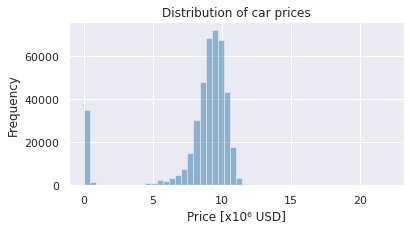

In [40]:
# To check whether the column is uniform or not , we plot the graph for the new column i.e "logprice"
plot_histogram(df.logprice) 

In [41]:
# Now the data is uniform.
# We can now remove the outlier using IQR .
# But before that we convert the "Price" attribute to string , so that IQR is not applied on that , later we will once again bring it 
# to int64 format.
df['price'] = df.price.astype(str)

In [42]:
# Now , we will apply IQR 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [43]:
Q1

year         2008.000000
odometer    62150.800000
lat            31.662190
long         -108.155500
logprice        8.411833
Name: 0.25, dtype: float64

In [44]:
Q3

year          2015.000000
odometer    126817.000000
lat             41.589400
long           -82.472400
logprice         9.851984
Name: 0.75, dtype: float64

In [45]:
IQR

year            7.000000
odometer    64666.200000
lat             9.927210
long           25.683100
logprice        1.440151
dtype: float64

In [46]:
# Now we update the dataset , by removing the outliers using IQR 
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [47]:
# As said earlier , we once again bring back the data type of the "Price" attribute to int64 format
df['price'] = df.price.astype(np.int64)

In [48]:
# As the dataset is quite clean now , we will delete all those car models that appear less than 1000 times.
# This step will dramatically reduce the chance of unrealistic model names and manufacturer-model combinations appearing in our dataset. 
# It will also ensure that the proposed machine-learning models have enough relevant data to understand the interrelations between car attributes or characteristics and their prices.


In [49]:
df = df.groupby("model").filter(lambda x: len(x) >= 1000)
df.reset_index(drop=True, inplace=True)

In [50]:
# Next , we will fill the missing values of manufacturer column with the mode of that column i.e most occuring value.
df['manufacturer'] = df.groupby('model').manufacturer.transform(
    lambda x: x.fillna(x.mode()[0])
)

In [51]:
# Next, let us sort the dataset and browse through some of its rows.
df.sort_values(by=['year','manufacturer', 'price'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [52]:
df.iloc[np.r_[0:3, -3:0]]

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,logprice,price
0,worcester / central MA,1998.0,chevrolet,silverado 1500,fair,5 cylinders,gas,133823.000000,clean,automatic,4wd,full-size,pickup,grey,ma,42.6844,-71.4204,6.685861,800
1,green bay,1998.0,chevrolet,1500,fair,6 cylinders,gas,180000.000000,clean,manual,4wd,full-size,pickup,grey,wi,44.7046,-87.3968,6.908755,1000
2,reading,1998.0,chevrolet,tahoe,good,5 cylinders,gas,218000.000000,clean,automatic,4wd,full-size,pickup,red,pa,40.3274,-75.7311,7.048386,1150
65989,north jersey,2021.0,honda,accord,new,5 cylinders,gas,1411.600000,clean,automatic,4wd,full-size,pickup,grey,nj,40.8789,-74.1425,6.908755,1000
65990,greenville / upstate,2021.0,toyota,corolla,new,5 cylinders,gas,0.000000,clean,automatic,fwd,full-size,pickup,white,sc,34.9352,-81.9654,10.041073,22949
65991,plattsburgh-adirondacks,2021.0,volkswagen,jetta,good,4 cylinders,gas,2453.166667,clean,manual,fwd,compact,pickup,blue,ny,44.2958,-74.0006,7.313887,1500


In [53]:
# The structure and standard summary statistics of the updated dataset are as follows: 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65992 entries, 0 to 65991
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        65992 non-null  object 
 1   year          65992 non-null  float64
 2   manufacturer  65992 non-null  object 
 3   model         65992 non-null  object 
 4   condition     65992 non-null  object 
 5   cylinders     65992 non-null  object 
 6   fuel          65992 non-null  object 
 7   odometer      65992 non-null  float64
 8   title_status  65992 non-null  object 
 9   transmission  65992 non-null  object 
 10  drive         65992 non-null  object 
 11  size          65992 non-null  object 
 12  type          65992 non-null  object 
 13  paint_color   65992 non-null  object 
 14  state         65992 non-null  object 
 15  lat           65992 non-null  float64
 16  long          65992 non-null  float64
 17  logprice      65992 non-null  float64
 18  price         65992 non-nu

In [54]:
df.describe()

,year,odometer,lat,long,logprice,price
count,65992.000000,65992.000000,65992.000000,65992.000000,65992.000000,65992.000000
mean,2012.124029,100103.592583,38.604673,-92.370083,9.301889,14559.900306
std,4.962166,54240.935438,5.107826,15.487139,0.808310,10848.695558
min,1998.000000,0.000000,16.940100,-145.460000,6.251904,518.000000
25%,2009.000000,54645.000000,35.283400,-98.471200,8.824825,6800.000000
50%,2013.000000,101074.500000,39.374350,-87.889800,9.391828,11989.000000
75%,2016.000000,140475.750000,42.449000,-81.281850,9.851984,18995.000000
max,2021.000000,223814.000000,52.737800,-67.483200,11.982742,159969.000000


In [55]:
# Mean , Median , Mode of the Target Variable 
print('Mean: ', round(df.price.mean()))
print()
print('Median: ', round(df.price.median()))
print()
print('Mode: ', df.price.mode()[0])

Mean:  14560

Median:  11989

Mode:  8995


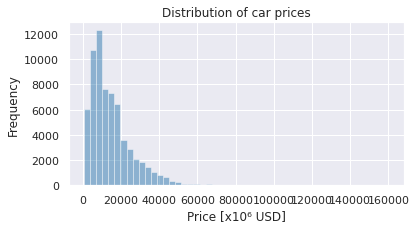

In [56]:
# The mean > median > mode 
# i.e most of the data is on the lower side 
plot_histogram(df.price)

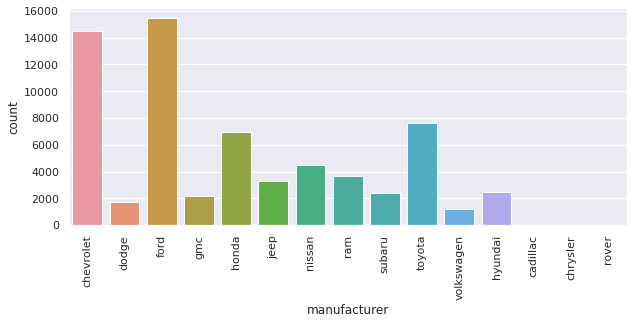

In [57]:
# Now , plotting graph 
plt.figure(figsize=(10, 4))
plt.xticks(rotation=90)
sns.countplot(df.manufacturer);

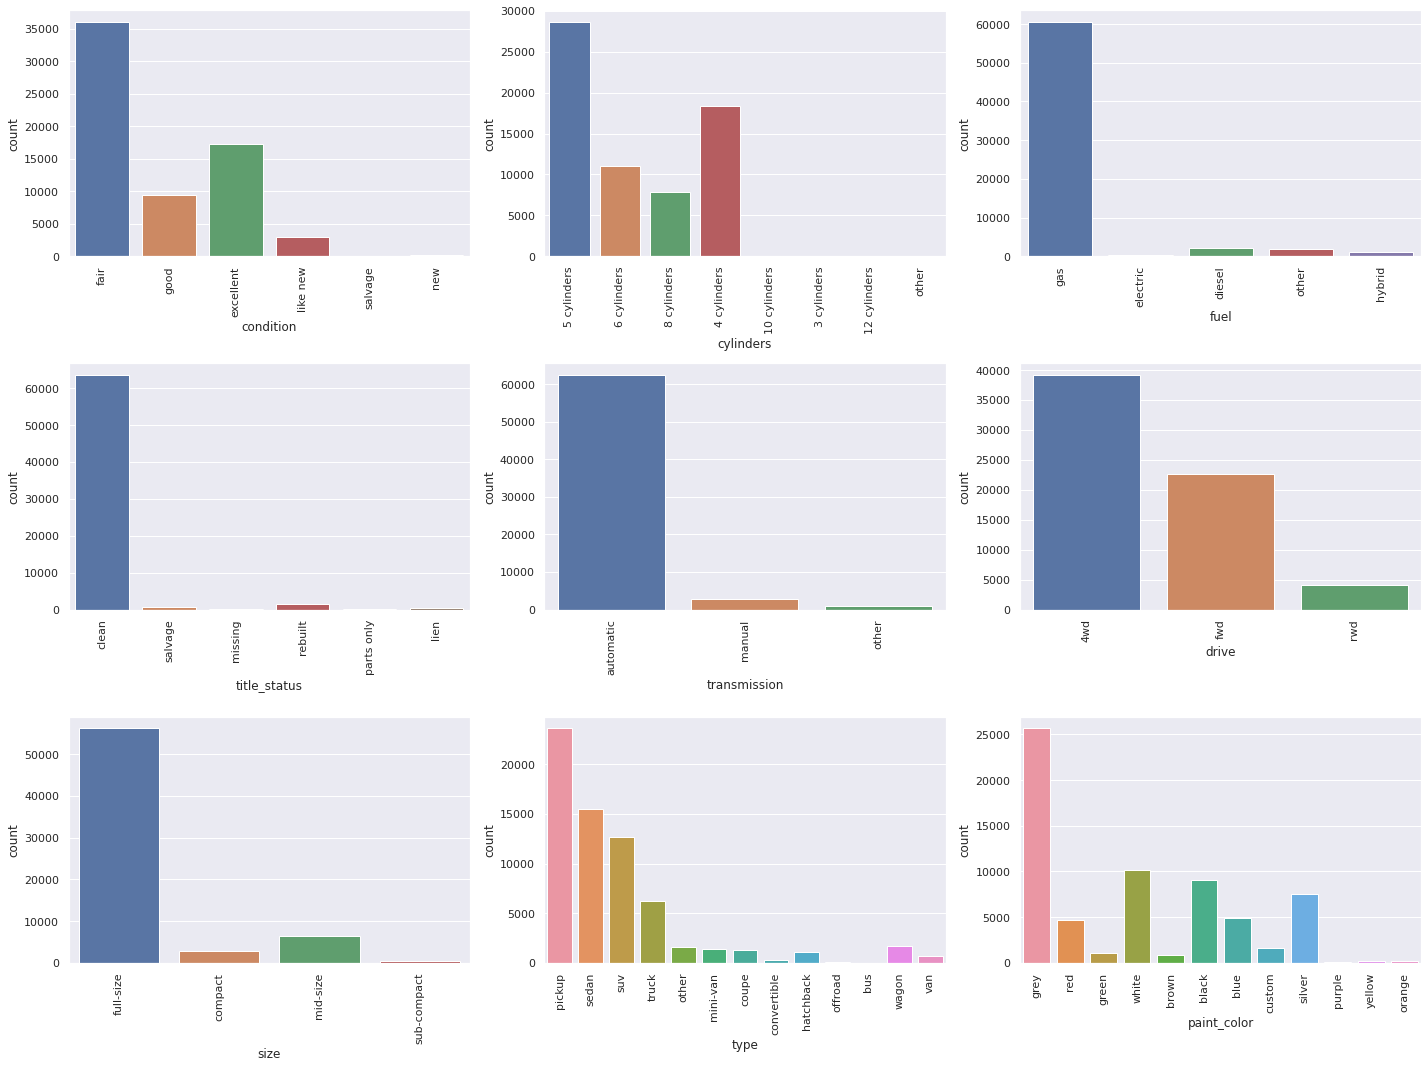

In [58]:
# Next, let us look at the counts of some of the other categorical variables.
categ_x = categorical.copy()
categ_x.remove('region')
categ_x.remove('state')

fig, ax = plt.subplots(3, 3, figsize=(20, 15))
for variable, subplot in zip(categ_x, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()

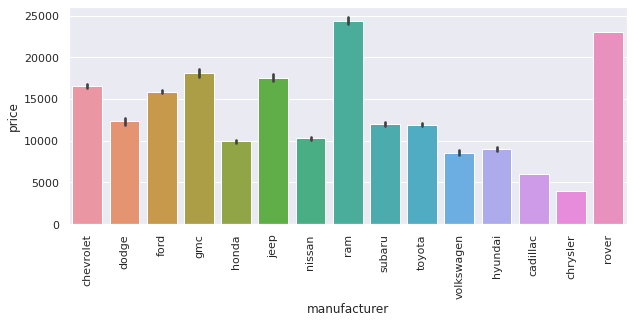

In [59]:
# Next, let us look at how prices are interrelated with various categorical variables.
plt.figure(figsize=(10, 4))
plt.xticks(rotation=90)
sns.barplot(x='manufacturer', y='price', data=df);

In [60]:
# As the graph above indicates, Ram Trucks lead on the price front.

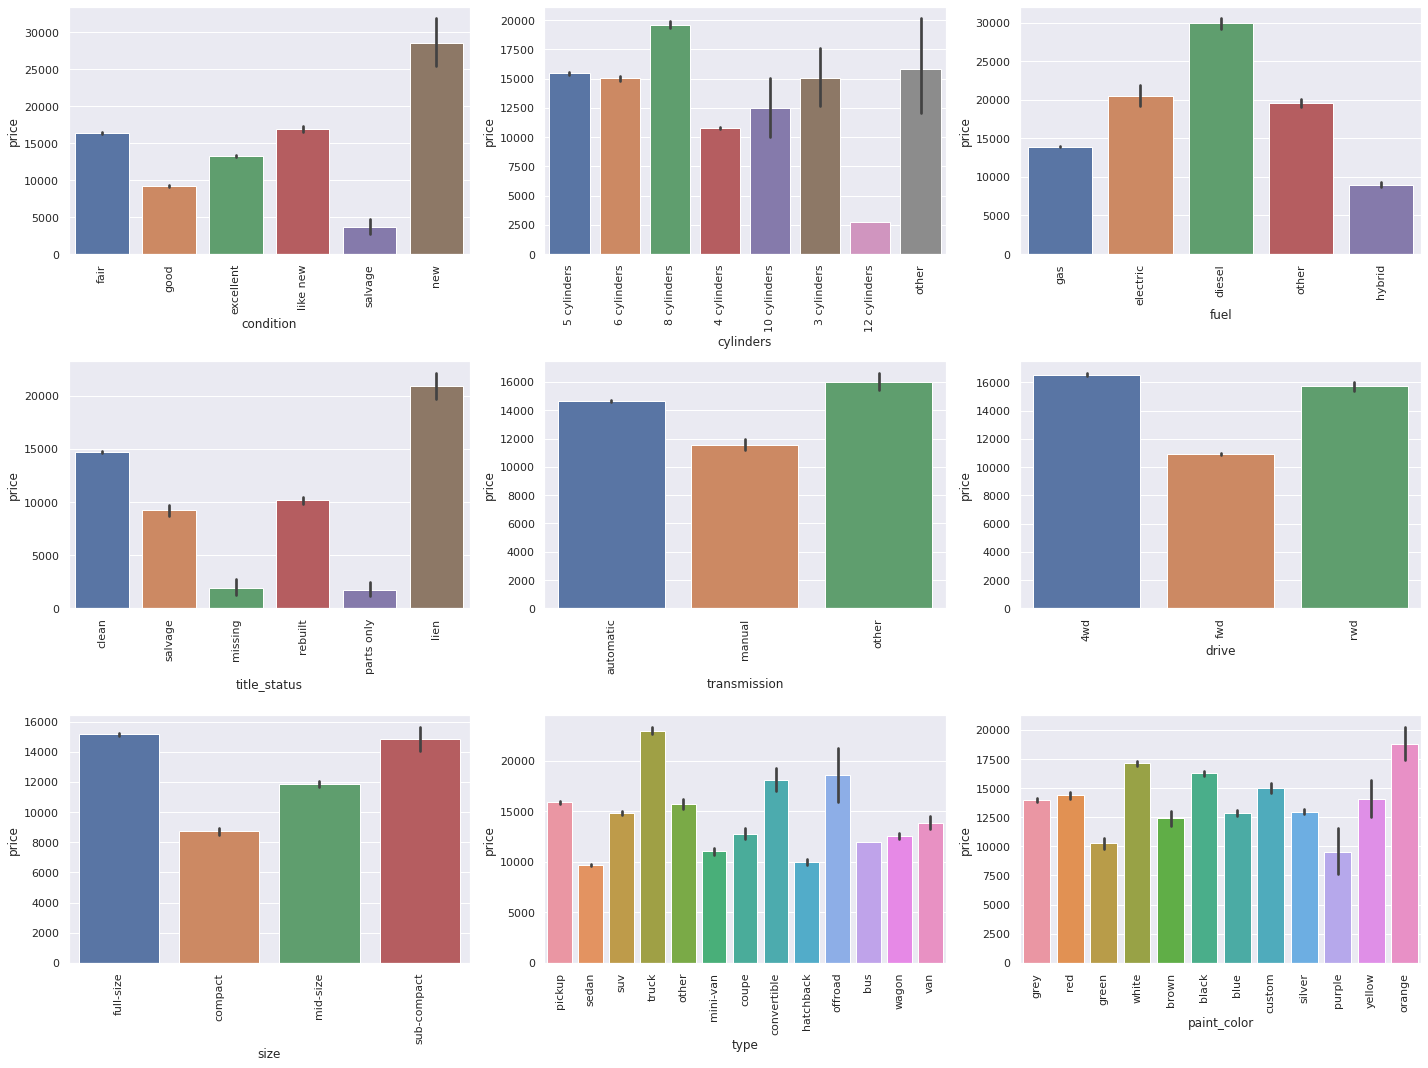

In [61]:
fig, ax = plt.subplots(3, 3, figsize=(20, 15))
for var, subplot in zip(categ_x, ax.flatten()):
    sns.barplot(x=var, y='price', data=df, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()

In [62]:
# The graphs above show that , new cars, diesel cars, cars that have liens on them, 
#and cars with four-wheel drives have higher average prices than other types of cars in their respective categories.

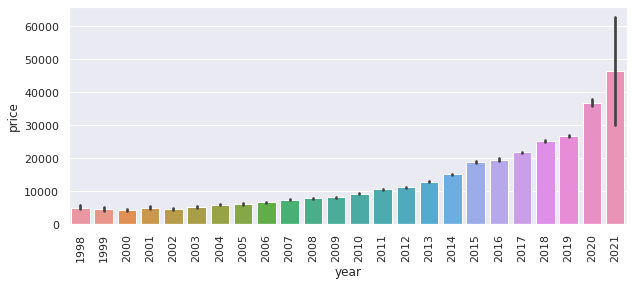

In [63]:
# Let us also look at how prices vary with year of manufacture
year = df.year.astype(np.int64)
price = df.price
plt.figure(figsize=(10, 4))
plt.xticks(rotation=90)
sns.barplot(year, price);

In [64]:
# The above graph shows that prices increase fairly consistently with year.

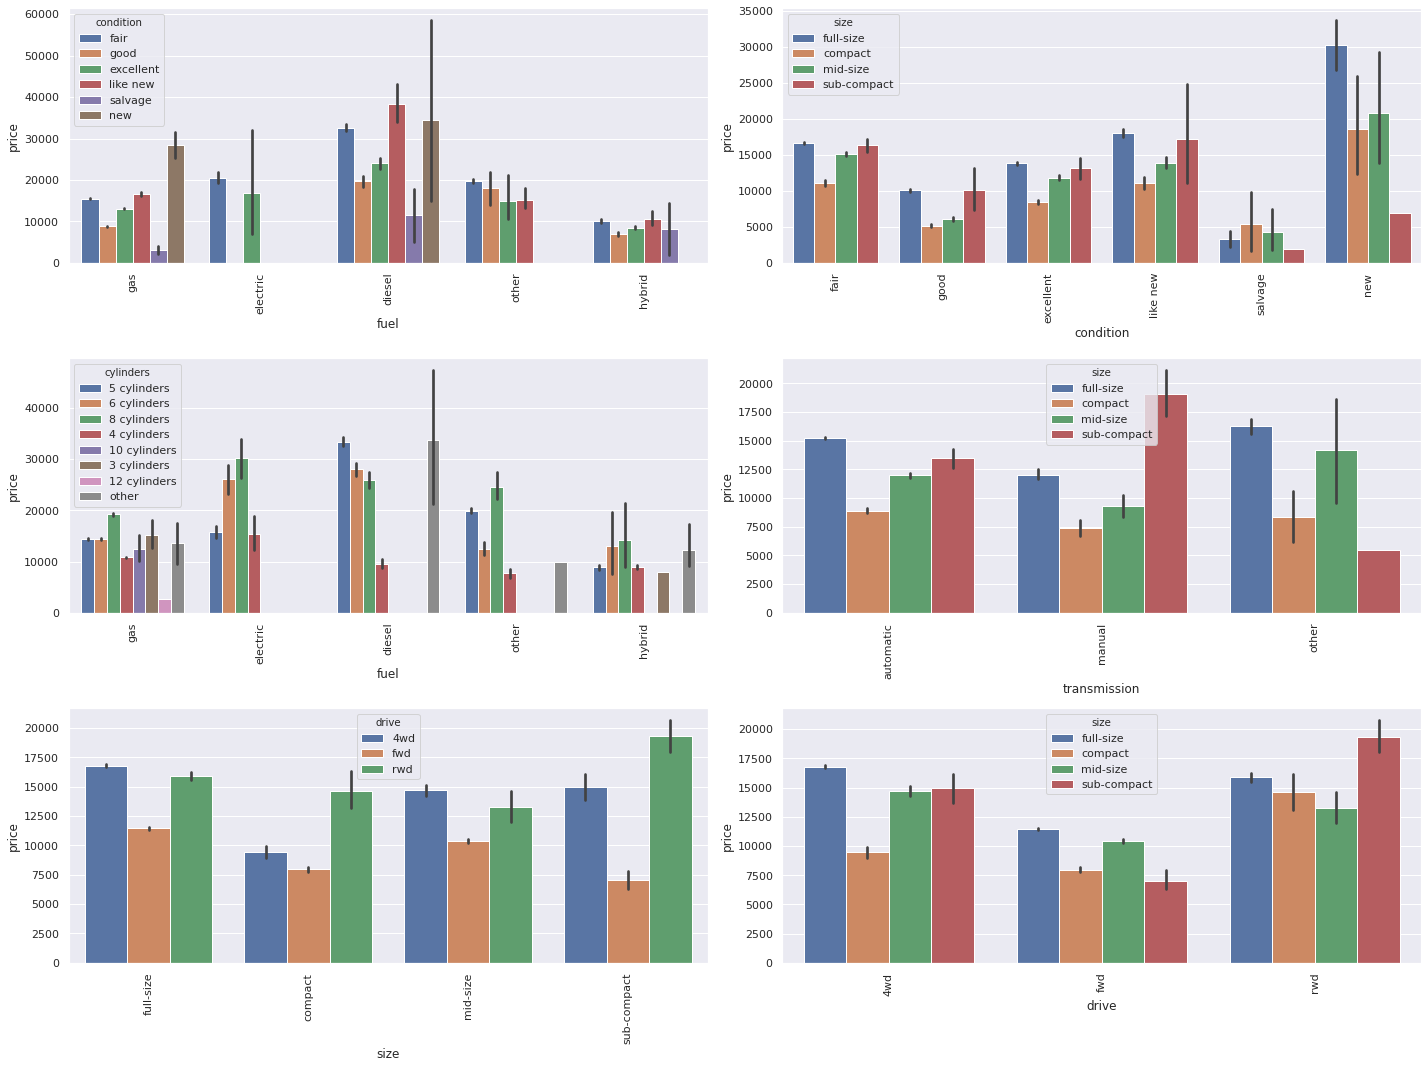

In [65]:
# Now let us plot graphs with 3 variables 
factor_combos = [('fuel', 'condition'), ('condition', 'size'),\
                 ('fuel', 'cylinders'), ('transmission', 'size'),\
                 ('size', 'drive'), ('drive', 'size')]
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
for var, subplot in zip(factor_combos, ax.flatten()):
    sns.barplot(x=var[0], y='price', hue=var[1], data=df, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()

In [66]:
# So, all the car characteristics in our dataset have some impact on the target variable, price.

In [67]:
# Linear Regression model building and Prediction

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split as split
import warnings
from sys import modules

In [69]:
vehicles_df_to_learn = df[['odometer','year','price']]

In [70]:
vehicles_df_to_learn = df.dropna()
vehicles_df_to_learn.shape

(65992, 19)

In [71]:
# we split the data into "train" - 75% and "test"- 25%
vehicles_df_train, vehicles_df_test = split(vehicles_df_to_learn, train_size=0.75, random_state=4222)

In [72]:
X_train = vehicles_df_train[['odometer','year']]
y_train = vehicles_df_train['price']

In [73]:
cars_lm = LinearRegression(fit_intercept=True)

In [74]:
cars_lm.fit(X_train, y_train)

LinearRegression()

In [75]:
print("The model intercept is: {}".format(cars_lm.intercept_))
print("The model coefficients are: {}".format(cars_lm.coef_[0]))

The model intercept is: -1914946.1119244632
The model coefficients are: -0.051884604572153915


In [76]:
X_train['Price_prediction'] = cars_lm.predict(X_train)
X_train.head()

,odometer,year,Price_prediction
34920,47783.00,2013.0,18121.784412
2678,71000.00,2002.0,6340.419447
31626,104983.05,2013.0,15153.982437
43398,28614.00,2015.0,21039.407688
52829,31154.00,2017.0,22830.668084


In [77]:
cars_train_rmse = np.sqrt(MSE(y_train, X_train['Price_prediction']))
print("RMSE = {:.2f}".format(cars_train_rmse))

RMSE = 8318.45


In [78]:
cars_lm_test = LinearRegression()

In [79]:
X_test = vehicles_df_test[['odometer','year']]
y_test = vehicles_df_test['price']

In [80]:
cars_lm_test.fit(X_test, y_test)

LinearRegression()

In [81]:
X_test['price_prediction'] = cars_lm_test.predict(X_test)
X_test.head()

,odometer,year,price_prediction
37679,93707.0,2014.0,16676.705924
12624,215773.0,2008.0,4636.258127
60577,31640.5,2018.0,23711.133836
65857,5015.0,2020.0,27001.798468
36741,102086.0,2014.0,16246.042484


In [82]:
cars_test_rmse = np.sqrt(MSE(y_test, X_test['price_prediction']))
print("RMSE = {:.2f}".format(cars_test_rmse))

RMSE = 8233.54


In [83]:
'''As you can see , the RMSE value of Train and Test are amlmost same . The accuracy of our project is high.'''

'As you can see , the RMSE value of Train and Test are amlmost same . The accuracy of our project is high.'